# Multi Variable Linear Regression

Name: Prashanth B

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.shape

(1338, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.isnull().any().sum()

0

In [ ]:
data.duplicated().any()

True

In [ ]:
data.duplicated().value_counts()

False    1337
True        1
dtype: int64

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(1337, 7)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


In [ ]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
data.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [ ]:
data.select_dtypes(include=['int64','float64']).columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [ ]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
data.sex = data.sex.apply(lambda x: 1 if x == 'male' else 0)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [ ]:
data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
data.smoker = data.smoker.apply(lambda x: 1 if x == 'yes' else 0)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [ ]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
region = pd.get_dummies(data['region'], drop_first=True, prefix='region')
region.head()

,region_northwest,region_southeast,region_southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


In [ ]:
data = pd.concat([data, region], axis=1)
data.head()

,age,sex,bmi,children,smoker,region,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,southwest,16884.92400,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,1,0,0


In [ ]:
data.drop('region', axis=1, inplace=True)
data.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
col = ['charges', 'age', 'bmi']
df_train[col] = scaler.fit_transform(df_train[col])
df_train.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
967,0.565217,1,0.253027,1,0,0.102096,1,0,0
522,0.717391,0,0.483051,0,0,0.139579,0,0,0
155,0.565217,1,0.633844,0,0,0.093008,1,0,0
672,0.391304,1,0.369653,0,0,0.052321,0,1,0
1173,0.434783,1,0.357815,2,0,0.085173,1,0,0


In [ ]:
y_train = df_train.pop('charges')
x_train = df_train

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
col = ['charges', 'age', 'bmi']
df_test[col] = scaler.transform(df_test[col])

In [ ]:
y_test = df_test.pop('charges')
x_test = df_test

In [ ]:
y_pred = model.predict(x_test)

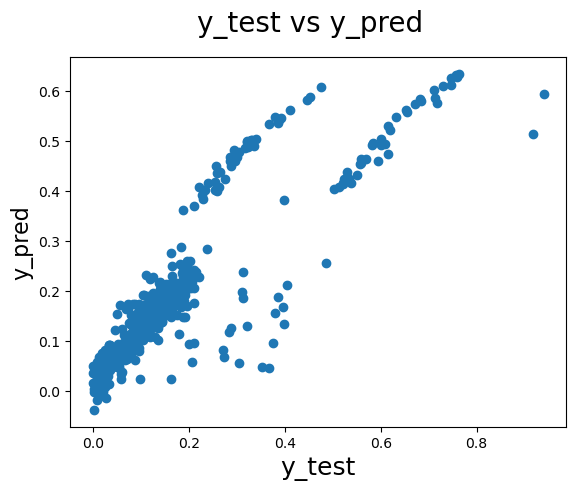

In [ ]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)
plt.show()

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)

0.75735167131613


Thank you